<a href="https://colab.research.google.com/github/ayush-dhanker/Image-Classification-on-MNIST/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [7]:
# normalizing and transforming
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

# Loading Datasets
train_dataset=datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=datasets.MNIST(root='./data',train=False,download=True,transform=transform)

# Data loaders
train_loader=DataLoader(train_dataset,batch_size=128,shuffle=True, drop_last=True, num_workers=5)
test_loader=DataLoader(test_dataset,batch_size=128,shuffle=False, num_workers=8)

100%|██████████| 9.91M/9.91M [00:00<00:00, 41.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.19MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.66MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoad

In [10]:
# model

# model= nn.Sequential(
      # nn.flatten(),
#     nn.linear(784,512),
#     nn.ReLU(),
#     nn.linear(512,128),
#     nn.ReLU(),
#     nn.linear(128,10).to(device)
# )

# print("model = ",model)
# with torch.no_grad():
#     print("Maximum weight before custom init: ", model[1].weight.max())


# def glorot_init(layer: nn.Module):
#     if isinstance(layer, nn.Linear):
#         nn.init.xavier_uniform_(layer.weight)
#         nn.init.zeros_(layer.bias)


# with torch.no_grad():
#     model.apply(glorot_init)
#     print("Maximum weight after custom init", model[1].weight.max())
class myNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784,512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,10)
        )

    def forward(self, x):
        return self.model(x)


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = myNN().to(device)

In [12]:
lr = 0.001
epochs=25
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [13]:
# model training
train_losses = []

for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1, Loss: 2.2235
Epoch 2, Loss: 2.0010
Epoch 3, Loss: 1.6563
Epoch 4, Loss: 1.2639
Epoch 5, Loss: 0.9598


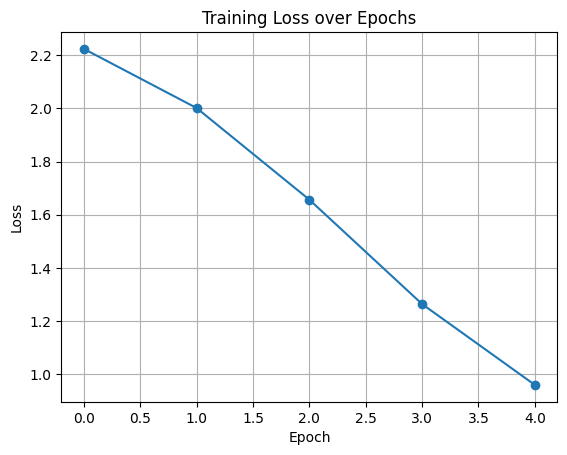

In [14]:
plt.plot(train_losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [15]:
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Accuracy: 82.60%
